# Introduction to uncertainty analysis

From the great lecture on Fluke website [fluke lecture on uncertainty](https://www.fluke.com/en-us/learn/blog/electrical-calibration/introduction-iso-guide-expression-uncertainty-measurement-gum)

- True value is uknown and unpredictable - nature
- error is a measured quantity value minus a reference quantity value
- error is a physical reality, a difference between measured and true values
- error is not the same as *uncertainty*, error causes uncertainty
- not to be confused with production error or mistake


Uncertainty is a number that characterizes the dispersion of values attributed to a measurand, based on the information in hand (including theory, our assumptions and our measurements)

this is an interval about the measured value that we are reasonably confindent that the true value lies within. How confident? typically we would like to be confident 95% 
Our main goal is to estimate the uncertainty as correctly as possible. Only after that we might want to reduce it. 

quality of measurement is expressed as a comparison of the measurement uncertainty to the measured value (e.g. 1 mm uncertainty in respect 1 meter or to 1 micrometer)

if uncertainty is unknown how can we judget the quality of anything? or our manufacturing? of our product? of our theory? 



the objective of a measurement is ALWAYS: to determine the value of the measurand, so it begins with : define a measurand, 
- the definition has to be completed by defining the accuracy required

the result of the measurement is only an estimate of the value of the measurand and is only complete when it is 
accompanied by the statement of uncertainty of that estimate. 


The first step in determining the uncertainty is to understand the theory, i.e. the relationship between the measurand and 
all the input quantities:

$$ \Omega = (\Omega_R + \delta \Omega_R) \times \frac{\Omega_M}{\Omega_R}
 + \delta \Omega_A + \delta \Omega_{random} $$

Then we need to evaluate the standard uncertainty of each input quantity

Standard uncertainty is defined as an uncertainty of the result of measurement expressed as standard deviation


Type A - evaluated by the statistical analysis of a series of observations. - can contain operator variance, repeatibility, reproducibility, environmental conditons

Type B - evaluated by other means that statistical analysis: uncertainty due to standards, resolution, data acquisition, bias corrections (thermal expansion has its own uncertainty)



For $n$ measurements: $(x_1, x_2, x_3, ..., x_n)$
calculate the mean: $$\bar{x} = 1/n \sum_{i=1}^{n} x_i$$
calculate the experimental standard deviation: $$S(x_i) = \sqrt{\sum_{i=1}{n} \frac{(x_i - x_n)^2}{n-1}}$$
calculate experimental standard deviation of the mean: $$S(\bar{x}) = \frac{S(x_i)}{\sqrt{n}} = u(x) $$

1. If your measurement is the average of a series of measurements, use standard deviation of the mean 
2. If it's a repeatibility study that will serve as an estimate for many tests, use a standard deviation of the separate tests
3. There are also other ways to estimate type A evaluation, e.g. linear regression

68% is k = 1 under the Gaussian curve, extend it with k = 2


Type B: from theory, handbooks, etc. 

1. in normal distributions we used k = 1, 2, 3 to explain coverage factor
2. in other distributions, we need to find out one sigma - standard deviation of it to make it similar to type A
3. for each distribution we need to know how to divide from 100% confidence to 1 std: uniform distribution (digital resolution, or we have no information or little information, most conservative)
the probabiliy under a rectangle is 100%, outside is zero, divide by $\sqrt{3}$, if manufacturer does not specify information about coverage factors, use rectanglar for worst case
4. U-shaped (derivative of a sine function), e.g. temperature, microwave measurements, by $\sqrt{2}$



sensitivity coefficients: 
1. start with defining the relation of measurand to the input variables. e.g. direct relation is when we calibrate a meter with voltage source: $$ V_{disp} = V_{source}$, i.e. sensitivity coefficient is 1.
2. measure power: $$P = i^2 R$$, $$\partial P/\partial i = 2 i R$$, so the sensitivity coefficient is $2iR$
3. how do we use sensitivity coefficients? $$u(P_i) = \partial P/\partial i \, u(i)$$


We made few steps out of 8 steps:
1. defined measurand in terms of the equation, identified input variables and defined what uncertainty we want to achieve
2. identified error components or uncertainty components due to those errors
3. evaluated components by type A or B
4. identified their distributions
5. converted them to a standard deviation of the mean value or of the component
6. Now we need to combine those to a single value of our measurand uncertainty

Correlations: if quantities are unrelated they are presumably uncorrelated, if we use 10 resistors of the same value, calibrated from the same source, they might be correlated

1. if uncertainties are uncorrelated use root of squared sums $$u_c = \sqrt{u_x^2 + u_y^2 + u_z^2}$$
2. if they are 100% correlated, then use the worst case: $$u_c  = u_x + u_y + u_z$$
3. or use combinations: $$u_c = \sqrt{u_x^2 + (u_y + u_z)^2}$$
4. now we have combined standard uncertainty - this represents one standard deviation of a normal distribution.
5. note we use here a central limit theorem that different distributions all convolve to a normal distribution
6. increase the confidence interval by coverage factor of k = 2 to get approximately 95% 

    

1. Often one soure of uncertainty, e.g. number of repeated measurements has low degrees of freedom and dominates the uncertainty estimate (not enough freedom to play random as expected)
2. In this case we need to use Welch-Satterhwaite formula to determine effective degrees of freedom and use Student's t-table



GUM 8-step process paraphrased
1. Describe measured value of your measurement process
2. List the input quantities
3. Determine the uncertainty for each input quantity
4. Evaluate any covariances/correlations in input quantities
5. Calculate the measured value to report
6. Correctly combine the uncertainty components
7. Multiply the combined uncertainty by the coverage factor
8. Report the result in the proper format




Typical sources of uncertainty (not an inclusive list)
1. Definition of consider: if the component is not in your uncertainty budget there should be documentation as to why it was not considered to be signficant - no way to forget
2. calibration uncertainty - always there, either you do calibration or use manufacturer's calibration
3. instrument long stability - no instrument works the same for a long time, things get rusty
4. Misc. random elements - look around, Murphy is watching
5. Resolution - always there
6. Environment - always there, in multiple forms: temperature, pressure, humidity, dust, table water level, etc.
7. Instrument bias - no instrument is perfect
8. Add more - that is a chance you missed something important that will make the measurement useless at the end


The course and the 8-step provides the framework for assessing uncertainty, but 
** it cannot substitute for critical thinking, intelectual honesty, and professional skill **
the evaluation of uncertainty is neither a routine task not a purely mathematical one: it depends on detailed knowledge
of the nature of the measurand (pressure, temperature, wind velocity, surface roughness, stresses) and the measurement process. 
The quality and utility of the uncertainty quoated for a result of measurement therefore ultimately depend on the undertsanding, 
critical analysis, and integrity of those who contribute to the assignment of its value. 


    












In [ ]:
# JUPYTER NOTEBOOK: Surface Roughness Measurement with GUM-Based Uncertainty Analysis
# Author: Alex Liberzon and Perplexity Pro
# Course: Metrology for Mechanical Engineering
# Purpose: Single notebook implementing surface roughness measurement and full GUM-based uncertainty analysis

import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8')
np.random.seed(42)  # For reproducibility

print("=" * 100)
print("SURFACE ROUGHNESS MEASUREMENT WITH GUM-BASED UNCERTAINTY ANALYSIS")
print("A Comprehensive Example for Mechanical Engineering Students")
print("=" * 100)

# Measurement scenario metadata
scenario = {
    "Objective": "Measure average surface roughness (Ra) of a machined steel surface",
    "Instrument": "Stylus profilometer (contact method)",
    "Evaluation length (L)": "4.0 mm",
    "Cutoff wavelength (λc)": "0.8 mm",
    "Number of measurements (n)": 10,
    "Environment": "20±2°C, 45±10% RH"
}

print("\nMEASUREMENT SCENARIO:")
for k, v in scenario.items():
    print(f"- {k}: {v}")


SURFACE ROUGHNESS MEASUREMENT WITH GUM-BASED UNCERTAINTY ANALYSIS
A Comprehensive Example for Mechanical Engineering Students

MEASUREMENT SCENARIO:
- Objective: Measure average surface roughness (Ra) of a machined steel surface
- Instrument: Stylus profilometer (contact method)
- Evaluation length (L): 4.0 mm
- Cutoff wavelength (λc): 0.8 mm
- Number of measurements (n): 10
- Environment: 20±2°C, 45±10% RH


In [2]:
# Measurement data: 10 repeated Ra measurements (in micrometers, μm)
measurements = np.array([1.58, 1.62, 1.59, 1.61, 1.64, 1.57, 1.60, 1.63, 1.58, 1.61])
n = len(measurements)
xbar = np.mean(measurements)
s = np.std(measurements, ddof=1)  # sample standard deviation
sem = s / np.sqrt(n)

print("1) MEASUREMENT DATA AND BASIC STATISTICS")
print("-" * 60)
print(f"n = {n}")
print(f"Measurements (μm): {measurements}")
print(f"Mean (x̄): {xbar:.4f} μm")
print(f"Standard deviation (s): {s:.4f} μm")
print(f"Standard error of mean (SEM): {sem:.4f} μm")
print(f"Range: {np.min(measurements):.2f} – {np.max(measurements):.2f} μm")


1) MEASUREMENT DATA AND BASIC STATISTICS
------------------------------------------------------------
n = 10
Measurements (μm): [1.58 1.62 1.59 1.61 1.64 1.57 1.6  1.63 1.58 1.61]
Mean (x̄): 1.6030 μm
Standard deviation (s): 0.0231 μm
Standard error of mean (SEM): 0.0073 μm
Range: 1.57 – 1.64 μm


In [3]:
# Type A uncertainty: u_A = s / sqrt(n)
u_A = s / np.sqrt(n)
nu_A = n - 1  # degrees of freedom for Type A

print("2) TYPE A UNCERTAINTY (REPEATABILITY)")
print("-" * 60)
print("Formula: u_A = s / √n")
print(f"Calculation: u_A = {s:.4f} / √{n} = {u_A:.5f} μm")
print(f"Degrees of freedom (ν_A) = {nu_A}")


2) TYPE A UNCERTAINTY (REPEATABILITY)
------------------------------------------------------------
Formula: u_A = s / √n
Calculation: u_A = 0.0231 / √10 = 0.00731 μm
Degrees of freedom (ν_A) = 9


In [4]:
# Type B uncertainties: define sources and convert to standard uncertainties
# For each source: stated ±value (μm), distribution (normal or rectangular), divisor
# Normal distribution with k=2 → standard uncertainty = stated / 2
# Rectangular distribution → standard uncertainty = stated / √3

uncertainty_sources = {
    "Instrument calibration": {"value": 0.025, "distribution": "normal", "divisor": 2.0,
                               "description": "Calibration certificate (k=2)"},
    "Stylus tip radius": {"value": 0.020, "distribution": "rectangular", "divisor": np.sqrt(3),
                          "description": "Stylus geometry filtering effect"},
    "Measurement force": {"value": 0.015, "distribution": "rectangular", "divisor": np.sqrt(3),
                          "description": "Contact force variation"},
    "Environmental vibration": {"value": 0.012, "distribution": "rectangular", "divisor": np.sqrt(3),
                                "description": "Floor/acoustic disturbances"},
    "Temperature variation": {"value": 0.008, "distribution": "rectangular", "divisor": np.sqrt(3),
                              "description": "Thermal expansion effects"},
    "Digital filtering": {"value": 0.010, "distribution": "rectangular", "divisor": np.sqrt(3),
                          "description": "Algorithmic filtering uncertainty"}
}

type_b_std = {}
print("3) TYPE B UNCERTAINTY SOURCES")
print("-" * 60)
for src, p in uncertainty_sources.items():
    u_std = p["value"] / p["divisor"]
    type_b_std[src] = u_std
    print(f"{src}: ±{p['value']:.3f} μm | {p['distribution']} | Divisor = {p['divisor']:.3f} → u = {u_std:.5f} μm ({p['description']})")

# Combine Type B components (assumed independent)
u_B_sq = sum(u**2 for u in type_b_std.values())
u_B = np.sqrt(u_B_sq)

print(f"\nCombined Type B uncertainty: u_B = √(Σ u_i²) = {u_B:.5f} μm")


3) TYPE B UNCERTAINTY SOURCES
------------------------------------------------------------
Instrument calibration: ±0.025 μm | normal | Divisor = 2.000 → u = 0.01250 μm (Calibration certificate (k=2))
Stylus tip radius: ±0.020 μm | rectangular | Divisor = 1.732 → u = 0.01155 μm (Stylus geometry filtering effect)
Measurement force: ±0.015 μm | rectangular | Divisor = 1.732 → u = 0.00866 μm (Contact force variation)
Environmental vibration: ±0.012 μm | rectangular | Divisor = 1.732 → u = 0.00693 μm (Floor/acoustic disturbances)
Temperature variation: ±0.008 μm | rectangular | Divisor = 1.732 → u = 0.00462 μm (Thermal expansion effects)
Digital filtering: ±0.010 μm | rectangular | Divisor = 1.732 → u = 0.00577 μm (Algorithmic filtering uncertainty)

Combined Type B uncertainty: u_B = √(Σ u_i²) = 0.02162 μm


In [5]:
# Combined standard uncertainty: u_c = √(u_A² + u_B²)
u_c = np.sqrt(u_A**2 + u_B**2)

# Welch-Satterthwaite degrees of freedom (approximation):
# Type B often treated as large ν (>> 30), so ν_eff ≈ dominated by Type A
nu_eff = (u_c**4) / ((u_A**4) / nu_A)  # since u_B treated as large ν
confidence = 0.95
alpha = 1 - confidence

# Coverage factor k: for ν_eff >= ~30, k ≈ 2; else use t-distribution
k = 2.0 if nu_eff >= 30 else stats.t.ppf(1 - alpha/2, df=nu_eff)
U = k * u_c

print("4) COMBINED STANDARD UNCERTAINTY AND EXPANDED UNCERTAINTY")
print("-" * 60)
print(f"Combined standard uncertainty: u_c = √(u_A² + u_B²) = {u_c:.5f} μm")
print(f"Effective degrees of freedom (ν_eff) ≈ {nu_eff:.2f}")
print(f"Coverage factor (k) for {int(confidence*100)}% confidence: {k:.2f}")
print(f"Expanded uncertainty: U = k × u_c = {U:.4f} μm")
print(f"\nFINAL RESULT: Ra = {xbar:.3f} ± {U:.3f} μm (k = {k:.1f}, {int(confidence*100)}% confidence)")
print(f"Relative expanded uncertainty: {100*U/xbar:.1f}%")


4) COMBINED STANDARD UNCERTAINTY AND EXPANDED UNCERTAINTY
------------------------------------------------------------
Combined standard uncertainty: u_c = √(u_A² + u_B²) = 0.02282 μm
Effective degrees of freedom (ν_eff) ≈ 854.29
Coverage factor (k) for 95% confidence: 2.00
Expanded uncertainty: U = k × u_c = 0.0456 μm

FINAL RESULT: Ra = 1.603 ± 0.046 μm (k = 2.0, 95% confidence)
Relative expanded uncertainty: 2.8%


In [6]:
# Build full budget table with contributions
variance_total = u_c**2
rows = []
rows.append({
    "Uncertainty Source": "Repeatability (Type A)",
    "Type": "A",
    "Distribution": "Normal",
    "Standard Uncertainty (μm)": u_A,
    "Contribution (%)": (u_A**2 / variance_total) * 100
})

for src, u in type_b_std.items():
    rows.append({
        "Uncertainty Source": src,
        "Type": "B",
        "Distribution": uncertainty_sources[src]["distribution"].title(),
        "Standard Uncertainty (μm)": u,
        "Contribution (%)": (u**2 / variance_total) * 100
    })

budget_df = pd.DataFrame(rows)
budget_df["Standard Uncertainty (μm)"] = budget_df["Standard Uncertainty (μm)"].round(6)
budget_df["Contribution (%)"] = budget_df["Contribution (%)"].round(1)

print("5) UNCERTAINTY BUDGET TABLE")
print("-" * 60)
display(budget_df)

# Save to CSV for reporting
budget_df.to_csv("uncertainty_budget.csv", index=False)
summary_df = pd.DataFrame({
    "Parameter": ["Mean Ra", "Std deviation", "Type A", "Type B", "Combined (u_c)", "Coverage k", "Expanded (U)", "Relative U %"],
    "Value": [xbar, s, u_A, u_B, u_c, k, U, 100*U/xbar],
    "Unit": ["μm", "μm", "μm", "μm", "μm", "-", "μm", "%"]
})
summary_df.to_csv("surface_roughness_uncertainty_analysis.csv", index=False)

print("\nSaved:")
print("- uncertainty_budget.csv")
print("- surface_roughness_uncertainty_analysis.csv")


5) UNCERTAINTY BUDGET TABLE
------------------------------------------------------------


,Uncertainty Source,Type,Distribution,Standard Uncertainty (μm),Contribution (%)
0,Repeatability (Type A),A,Normal,0.007311,10.3
1,Instrument calibration,B,Normal,0.012500,30.0
2,Stylus tip radius,B,Rectangular,0.011547,25.6
3,Measurement force,B,Rectangular,0.008660,14.4
4,Environmental vibration,B,Rectangular,0.006928,9.2
5,Temperature variation,B,Rectangular,0.004619,4.1
6,Digital filtering,B,Rectangular,0.005774,6.4



Saved:
- uncertainty_budget.csv
- surface_roughness_uncertainty_analysis.csv


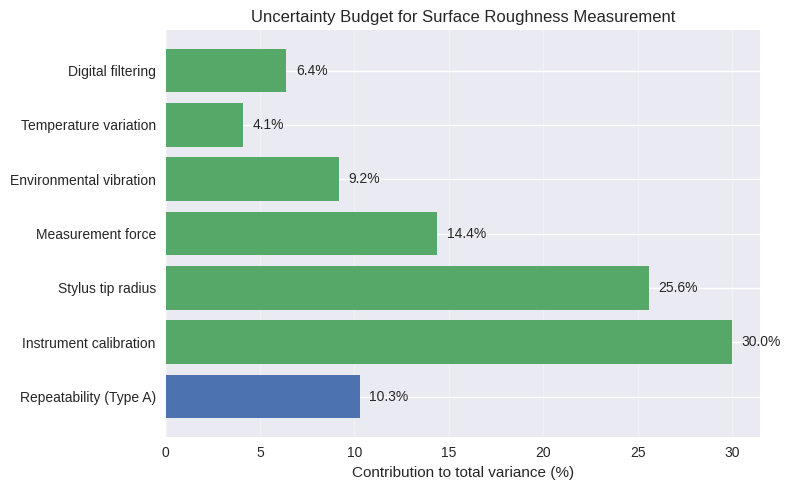

In [7]:
# Horizontal bar chart of contributions
fig, ax = plt.subplots(figsize=(8, 5))
colors = ["C0" if t == "A" else "C1" for t in budget_df["Type"]]
ax.barh(budget_df["Uncertainty Source"], budget_df["Contribution (%)"], color=colors)
ax.set_xlabel("Contribution to total variance (%)")
ax.set_title("Uncertainty Budget for Surface Roughness Measurement")
for i, v in enumerate(budget_df["Contribution (%)"]):
    ax.text(v + 0.5, i, f"{v:.1f}%", va='center')
ax.grid(True, axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


6) SURFACE PROFILE SIMULATION AND Ra CALCULATION
------------------------------------------------------------
Sampling interval: 1 μm | Points: 4002 | λc: 0.8 mm
Simulated Ra: 0.367 μm
Rq: 0.458 μm | Rt: 3.395 μm | Skewness: 0.091 | Kurtosis: -0.108


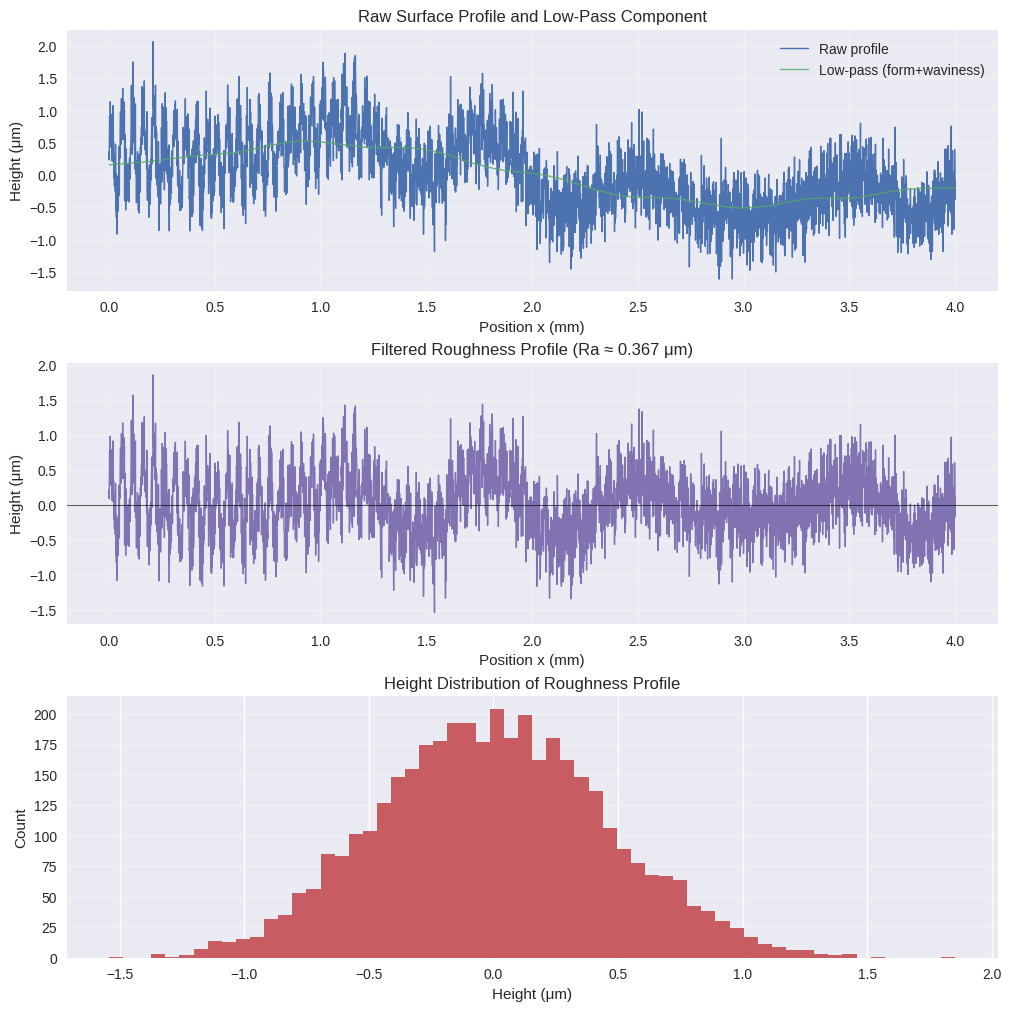

In [8]:
# Simulate a surface profile and compute Ra to illustrate the concepts

print("6) SURFACE PROFILE SIMULATION AND Ra CALCULATION")
print("-" * 60)

# Simulation parameters
L = 4.0               # evaluation length (mm)
dx = 0.001            # sampling interval (mm) = 1 μm
x = np.arange(0, L + dx, dx)
N = len(x)

# Components (μm-scale amplitudes)
form = 0.5 * np.sin(2 * np.pi * x / L)          # low freq form
waviness = 0.3 * np.sin(2 * np.pi * x / 0.8) + 0.2 * np.cos(2 * np.pi * x / 0.6)
rough = 0.8 * np.random.normal(0, 0.4, N)
rough += 0.6 * np.sin(2 * np.pi * x / 0.05) * np.exp(-x / 2.0)  # machining periodicity

profile = form + waviness + rough  # arbitrary μm-scale composite

# High-pass filtering via moving average subtraction to isolate roughness
lc = 0.8  # cutoff wavelength (mm)
window_pts = int(max(3, round(lc / dx)))
kernel = np.ones(window_pts) / window_pts
profile_lp = np.convolve(profile, kernel, mode='same')
roughness_profile = profile - profile_lp
roughness_profile -= np.mean(roughness_profile)  # remove mean line

# Calculate Ra (arithmetic mean of absolute deviations)
# Discrete approximation: Ra ≈ (1/N) * Σ |z_i|
Ra_sim = np.mean(np.abs(roughness_profile))

Rq = np.sqrt(np.mean(roughness_profile**2))
Rt = np.max(roughness_profile) - np.min(roughness_profile)
skew = stats.skew(roughness_profile)
kurt = stats.kurtosis(roughness_profile)

print(f"Sampling interval: {dx*1000:.0f} μm | Points: {N} | λc: {lc} mm")
print(f"Simulated Ra: {Ra_sim:.3f} μm")
print(f"Rq: {Rq:.3f} μm | Rt: {Rt:.3f} μm | Skewness: {skew:.3f} | Kurtosis: {kurt:.3f}")

# Plots: raw profile, filtered roughness, and histogram
fig, axs = plt.subplots(3, 1, figsize=(10, 10), constrained_layout=True)

axs[0].plot(x, profile, lw=1, label="Raw profile")
axs[0].plot(x, profile_lp, lw=1, alpha=0.8, label="Low-pass (form+waviness)")
axs[0].set_title("Raw Surface Profile and Low-Pass Component")
axs[0].set_xlabel("Position x (mm)")
axs[0].set_ylabel("Height (μm)")
axs[0].grid(True, alpha=0.3)
axs[0].legend()

axs[1].plot(x, roughness_profile, color="C3", lw=1)
axs[1].axhline(0, color="k", lw=0.8, alpha=0.6)
axs[1].set_title(f"Filtered Roughness Profile (Ra ≈ {Ra_sim:.3f} μm)")
axs[1].set_xlabel("Position x (mm)")
axs[1].set_ylabel("Height (μm)")
axs[1].grid(True, alpha=0.3)

axs[2].hist(roughness_profile, bins=60, color="C2", alpha=0.9)
axs[2].set_title("Height Distribution of Roughness Profile")
axs[2].set_xlabel("Height (μm)")
axs[2].set_ylabel("Count")
axs[2].grid(True, axis='y', alpha=0.3)

plt.show()


7) SENSITIVITY ANALYSIS
------------------------------------------------------------
n =  3 → u_A = 0.01335 μm
n =  5 → u_A = 0.01034 μm
n = 10 → u_A = 0.00731 μm
n = 15 → u_A = 0.00597 μm
n = 20 → u_A = 0.00517 μm
n = 30 → u_A = 0.00422 μm

Calibration uncertainty vs. expanded uncertainty (all else constant):
±0.010 μm → U = 0.0395 μm
±0.015 μm → U = 0.0410 μm
±0.020 μm → U = 0.0431 μm
±0.025 μm → U = 0.0456 μm
±0.030 μm → U = 0.0486 μm
±0.035 μm → U = 0.0518 μm


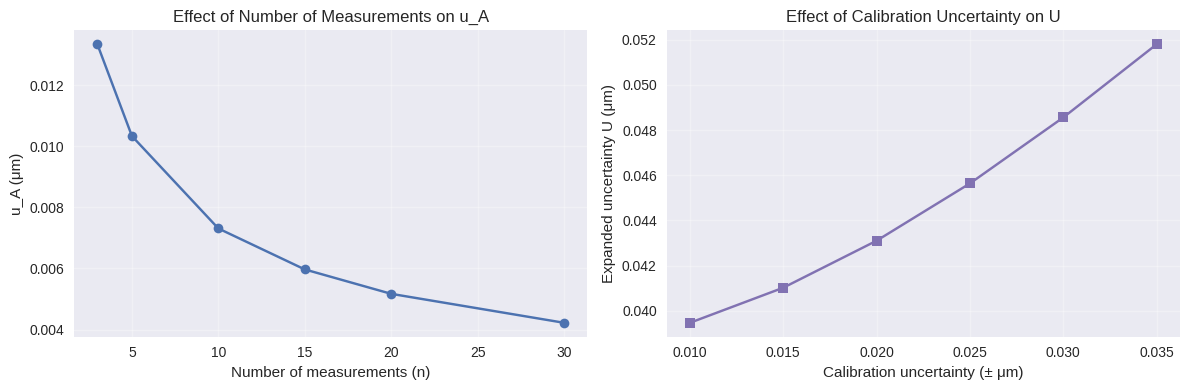

In [9]:
# Sensitivity analysis: illustrate how choices affect uncertainty

print("7) SENSITIVITY ANALYSIS")
print("-" * 60)

# Effect of number of measurements on Type A
n_list = np.array([3, 5, 10, 15, 20, 30])
uA_list = s / np.sqrt(n_list)
for n_i, uA_i in zip(n_list, uA_list):
    print(f"n = {n_i:2d} → u_A = {uA_i:.5f} μm")

# Effect of calibration uncertainty on expanded uncertainty
cal_list = np.array([0.010, 0.015, 0.020, 0.025, 0.030, 0.035])  # ± values, μm
U_list = []
for cal in cal_list:
    u_cal = cal / 2  # normal, k=2
    u_B_temp_sq = u_cal**2 + sum(u**2 for src, u in type_b_std.items() if src != "Instrument calibration")
    u_B_temp = np.sqrt(u_B_temp_sq)
    u_c_temp = np.sqrt(u_A**2 + u_B_temp**2)
    U_temp = k * u_c_temp
    U_list.append(U_temp)

print("\nCalibration uncertainty vs. expanded uncertainty (all else constant):")
for cal, Uv in zip(cal_list, U_list):
    print(f"±{cal:.3f} μm → U = {Uv:.4f} μm")

# Plot sensitivity results
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].plot(n_list, uA_list, marker="o")
axs[0].set_title("Effect of Number of Measurements on u_A")
axs[0].set_xlabel("Number of measurements (n)")
axs[0].set_ylabel("u_A (μm)")
axs[0].grid(True, alpha=0.3)

axs[1].plot(cal_list, U_list, marker="s", color="C3")
axs[1].set_title("Effect of Calibration Uncertainty on U")
axs[1].set_xlabel("Calibration uncertainty (± μm)")
axs[1].set_ylabel("Expanded uncertainty U (μm)")
axs[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [10]:
print("8) SUMMARY AND KEY LEARNING POINTS")
print("-" * 60)

print(f"Final result: Ra = {xbar:.3f} ± {U:.3f} μm (k = {k:.1f}, 95% confidence)")
print(f"Relative expanded uncertainty: {100*U/xbar:.1f}%")

# Identify top contributors
top = budget_df.sort_values("Contribution (%)", ascending=False)
print("\nTop contributors to uncertainty:")
print(top[["Uncertainty Source", "Contribution (%)"]].head(5).to_string(index=False))

print("\nKey learning points:")
points = [
    "GUM provides a systematic framework for uncertainty evaluation.",
    "Type A uncertainty captures random repeatability (u_A = s/√n).",
    "Type B uncertainty aggregates systematic effects from known sources.",
    "Combine independent components using root-sum-of-squares: u_c = √(u_A² + u_B²).",
    "Use coverage factor k (e.g., ~2 for 95%) to report expanded uncertainty U = k × u_c.",
    "Focus improvement efforts on the largest contributors in the uncertainty budget.",
    "Surface roughness measurement is sensitive to calibration, stylus geometry, and force control.",
    "Always report the coverage factor and confidence level along with the result."
]
for p in points:
    print(f"- {p}")


8) SUMMARY AND KEY LEARNING POINTS
------------------------------------------------------------
Final result: Ra = 1.603 ± 0.046 μm (k = 2.0, 95% confidence)
Relative expanded uncertainty: 2.8%

Top contributors to uncertainty:
     Uncertainty Source  Contribution (%)
 Instrument calibration              30.0
      Stylus tip radius              25.6
      Measurement force              14.4
 Repeatability (Type A)              10.3
Environmental vibration               9.2

Key learning points:
- GUM provides a systematic framework for uncertainty evaluation.
- Type A uncertainty captures random repeatability (u_A = s/√n).
- Type B uncertainty aggregates systematic effects from known sources.
- Combine independent components using root-sum-of-squares: u_c = √(u_A² + u_B²).
- Use coverage factor k (e.g., ~2 for 95%) to report expanded uncertainty U = k × u_c.
- Focus improvement efforts on the largest contributors in the uncertainty budget.
- Surface roughness measurement is sensitive